In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [2]:
engine1 = pd.read_csv("UIPA.HMD8310H.Engine1.csv")
engine1["battery_only"] = engine1["dIECSPoweredByBatteryOnlyPilotTrip"].fillna(0).astype(int)
engine2 = pd.read_csv("UIPA.HMD8310H.Engine2.csv")

merged_df = pd.merge(engine1[["aIEngineLoad", "time", "battery_only"]], engine2[["aIEngineLoad", "time"]], on='time', how='inner')
merged_df["total_load"] = merged_df["aIEngineLoad_x"] + merged_df["aIEngineLoad_y"]

/tmp/ipykernel_14548/1076848645.py:1: DtypeWarning: Columns (152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386

In [2]:
battery = pd.read_csv("EP_Battery.Thing_HMD8310.csv")

/tmp/ipykernel_14613/2405356302.py:1: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  battery = pd.read_csv("EP_Battery.Thing_HMD8310.csv")


In [3]:
for column in battery:
    print(column)

Unnamed: 0
time
AVG_PACK_SOC
AvgSOC
AvgSOH
BATT_PACK_1_DISCONN
BATT_PACK_1_FAULT
BATT_PACK_1_WARN
BATT_PACK_2_DISCONN
BATT_PACK_2_FAULT
BATT_PACK_2_WARN
BATT_PACK_3_DISCONN
BATT_PACK_3_FAULT
BATT_PACK_3_WARN
BATT_PACK_4_DISCONN
BATT_PACK_4_FAULT
BATT_PACK_4_WARN
BATT_PACK_5_DISCONN
BATT_PACK_5_FAULT
BATT_PACK_5_WARN
BATT_PACK_6_DISCONN
BATT_PACK_6_FAULT
BATT_PACK_6_WARN
BATT_PACK_7_DISCONN
BATT_PACK_7_FAULT
BATT_PACK_7_WARN
BATT_ROOM_TEMP
Current
MAX_CELL_TEMP
MAX_CELL_VOL
MAX_PACK_SOC
MAX_UNCONN_PACK_VOL
MIN_CELL_TEMP
MIN_CELL_VOL
MIN_PACK_SOC
MIN_UNCONN_PACK_VOL
NUMBER_OF_PACKS_CONN
NUMBER_OF_PACKS_FAULTED
PACK1_CRIDATA_AVG_CELL_TEMP
PACK1_CRIDATA_AVG_CELL_VOL
PACK1_CRIDATA_BATT_VOL
PACK1_CRIDATA_BUS_VOL
PACK1_CRIDATA_CHARGE_CURR_LIMIT
PACK1_CRIDATA_CURR
PACK1_CRIDATA_DISCHARGE_CURR_LIMIT
PACK1_CRIDATA_SOC
PACK1_CRIDATA_SOH
PACK2_CRIDATA_AVG_CELL_TEMP
PACK2_CRIDATA_AVG_CELL_VOL
PACK2_CRIDATA_BATT_VOL
PACK2_CRIDATA_BUS_VOL
PACK2_CRIDATA_CHARGE_CURR_LIMIT
PACK2_CRIDATA_CURR
PACK2_CRIDA

<Axes: >

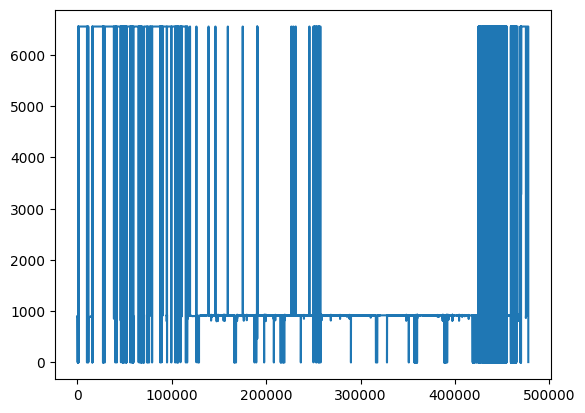

In [4]:
battery["Voltage"].plot()

<Axes: >

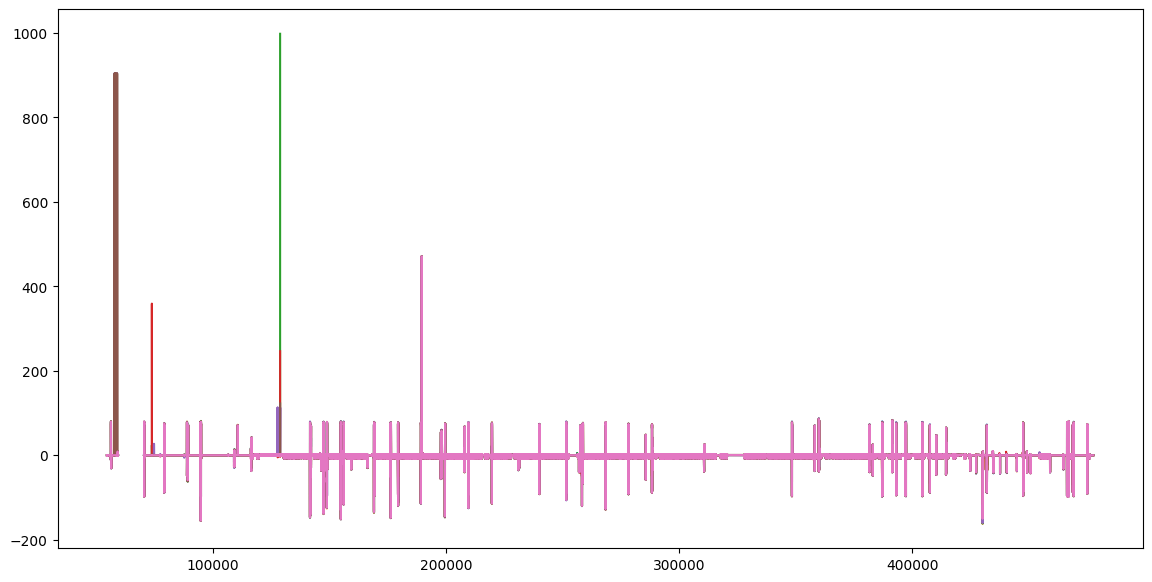

In [5]:
plt.figure(figsize=(14, 7))

battery["PACK1_CRIDATA_CURR"].plot()
battery["PACK2_CRIDATA_CURR"].plot()
battery["PACK3_CRIDATA_CURR"].plot()
battery["PACK4_CRIDATA_CURR"].plot()
battery["PACK5_CRIDATA_CURR"].plot()
battery["PACK6_CRIDATA_CURR"].plot()
battery["PACK7_CRIDATA_CURR"].plot()

<Axes: >

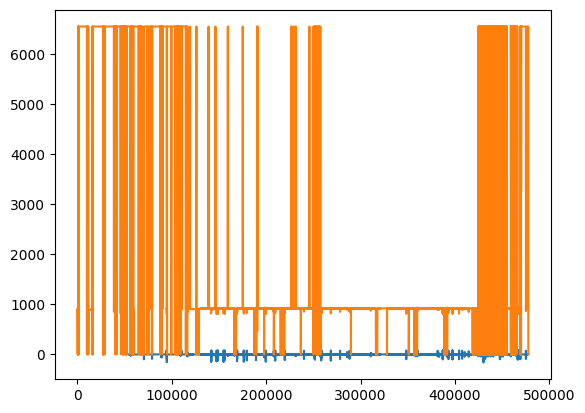

In [6]:
battery[battery["PACK1_CRIDATA_CURR"]<150]["PACK1_CRIDATA_CURR"].plot()
battery["Voltage"].plot()

<Axes: >

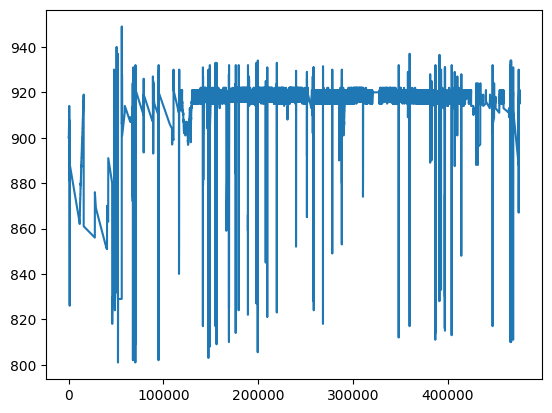

In [7]:
battery["PACK1_CRIDATA_CURR"]
battery.loc[(battery["Voltage"]>800) & (battery["Voltage"]<950), "Voltage"].plot()

<Axes: >

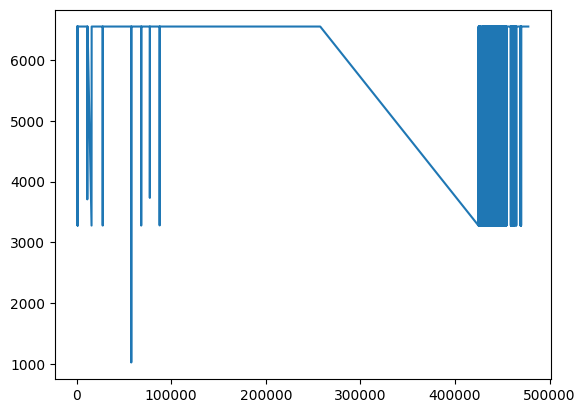

In [8]:
battery.loc[(battery["Voltage"]>950), "Voltage"].plot()

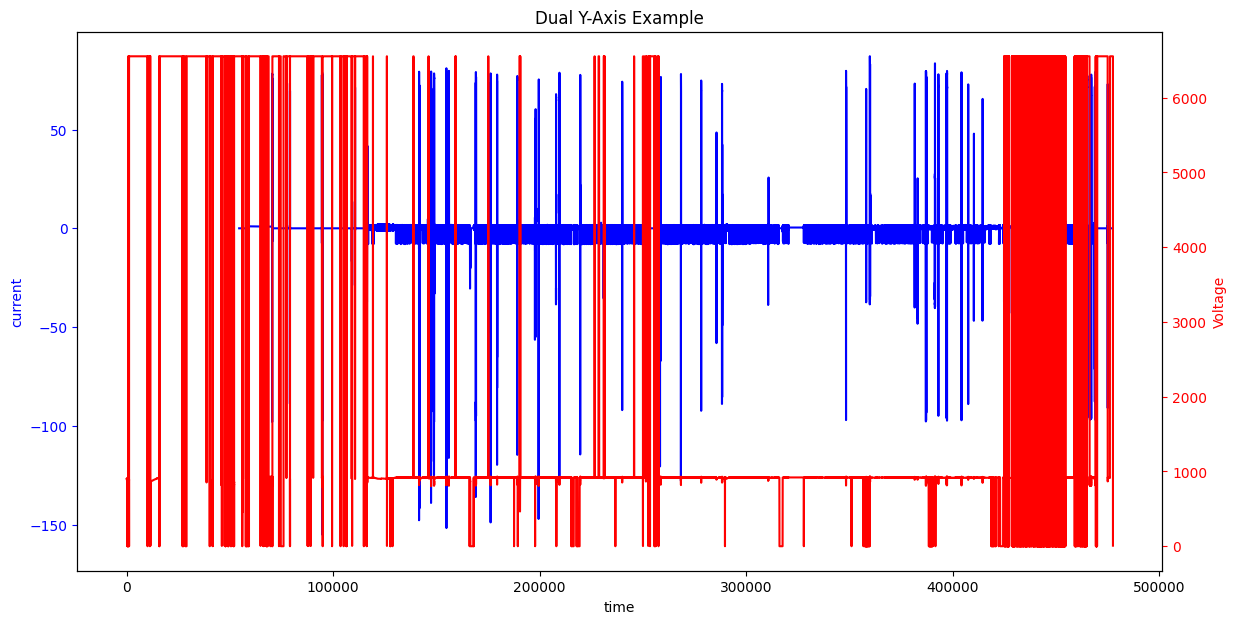

In [9]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the first curve with high values on the left y-axis
ax1.plot(battery[battery["PACK1_CRIDATA_CURR"]<150]["PACK1_CRIDATA_CURR"], 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('current', color='b')
ax1.tick_params('y', colors='b')

# Creating a second y-axis for the second curve with lower values
ax2 = ax1.twinx()
ax2.plot(battery["Voltage"], 'r-')
ax2.set_ylabel('Voltage', color='r')
ax2.tick_params('y', colors='r')

plt.title('Dual Y-Axis Example')
plt.show()

In [10]:
import math

# Initialize variables to keep track of the start and end indices of the current time series
start_index = None
end_index = None
currents = battery["PACK1_CRIDATA_CURR"]
socs = battery["PACK1_CRIDATA_SOC"]
voltages = battery["PACK1_CRIDATA_AVG_CELL_VOL"]
currents_list = []
socs_list = []
voltages_list = []

for i, value in enumerate(currents):
    if value == 0:
        if start_index is not None:
            # If we've already encountered a start index, this zero indicates the end of the time series
            end_index = i
            if start_index < end_index:
                # Extract the time series from start_index to end_index (inclusive)
                current_segment = currents[start_index:end_index+1]
                soc_segment = socs[start_index:end_index+1]
                voltage_segment = voltages[start_index:end_index+1]
                if not any(math.isnan(x) for x in current_segment):
                    # Check if there are no NaN values in the time series
                    currents_list.append(current_segment)
                    socs_list.append(soc_segment)
                    voltages_list.append(voltage_segment)
            # Reset start and end indices for the next time series
            start_index = None
            end_index = None
    elif start_index is None:
        # If we encounter a non-zero value and haven't yet found a start index, this is the start of a time series
        start_index = i

# Print the identified time series
# for i, currents in enumerate(currents_list):
#     print(f"Time Series {i + 1}: {currents}")

<Axes: >

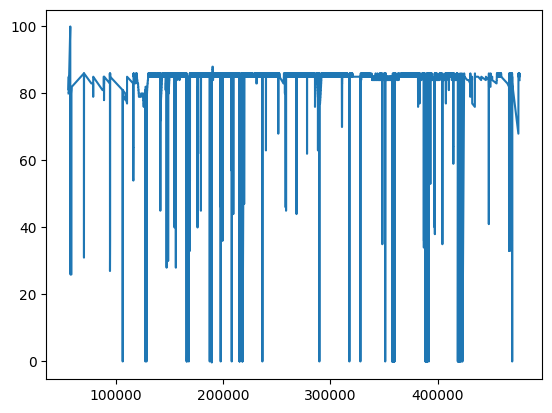

In [11]:
tmp = socs_list.copy()
pd.concat(tmp).plot()

# Use the only battery power data from the engine table

In [12]:
tmp = pd.merge(merged_df[["time", "battery_only"]], battery[["AVG_PACK_SOC", "time"]], on='time', how='inner')
tmp.shape

NameError: name 'merged_df' is not defined

In [13]:
merged_df[merged_df["battery_only"]>0]

NameError: name 'merged_df' is not defined

<Axes: >

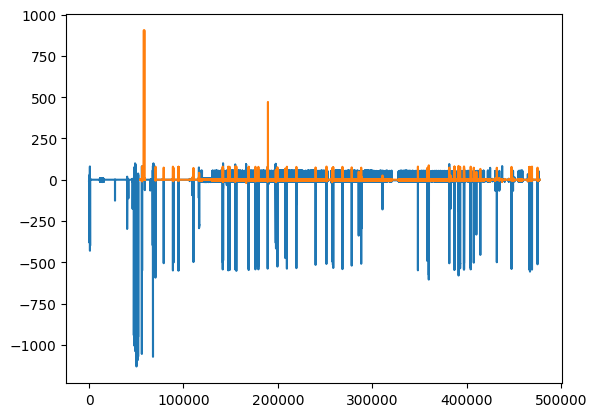

In [14]:
battery[battery["Current"]<100]["Current"].plot()
battery[battery["Current"]<100]["PACK1_CRIDATA_CURR"].plot()

<Axes: >

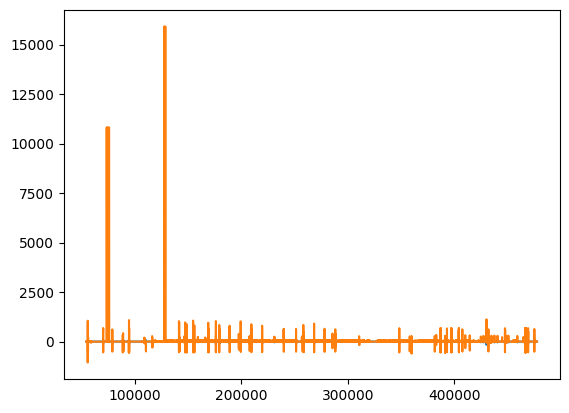

In [16]:
battery[battery["PACK1_CRIDATA_CURR"]<100]["PACK1_CRIDATA_CURR"].plot()
battery[battery["PACK1_CRIDATA_CURR"]<100]["Current"].plot()

<Axes: >

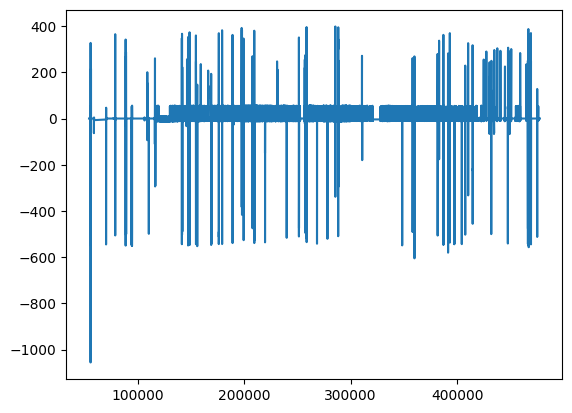

In [22]:
battery[battery["PACK1_CRIDATA_CURR"]<100][battery[battery["PACK1_CRIDATA_CURR"]<100]["Current"]<400]["Current"].plot()

1201.7

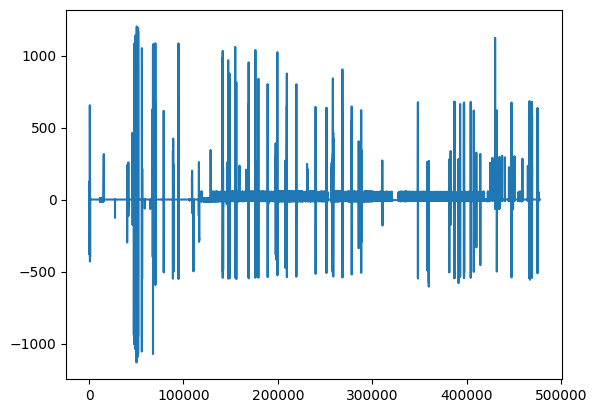

In [35]:
current = battery["Current"]
current[current<3000].plot()
current[current<3000].max()

<Axes: >

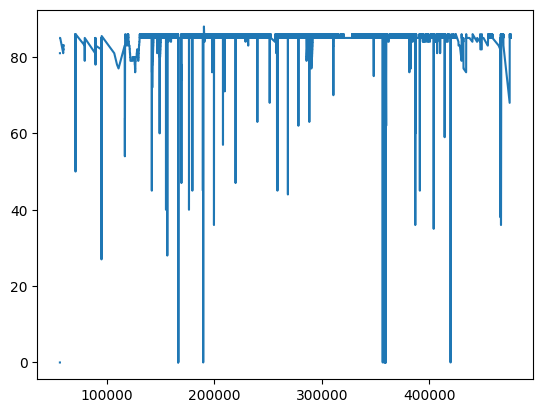

In [55]:
battery[(battery["Current"]<0) & (battery["Current"]>-200)]["AVG_PACK_SOC"].plot()
# current[current<-1000]

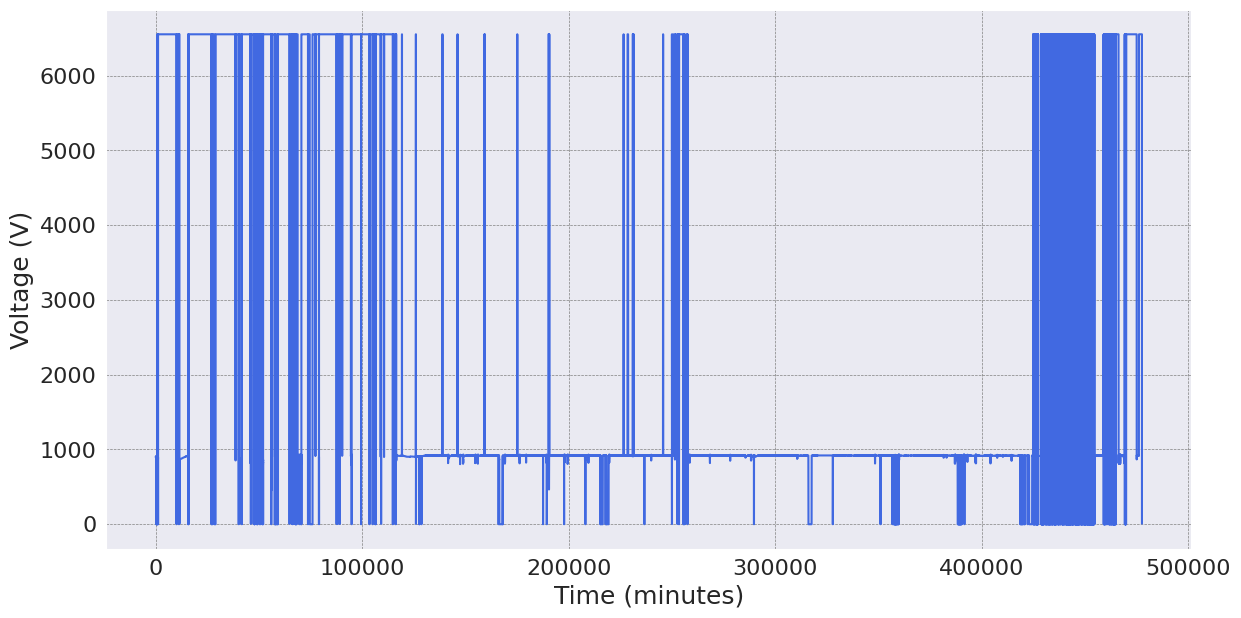

In [88]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.lineplot(battery["Voltage"], color="royalblue")

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Voltage (V)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

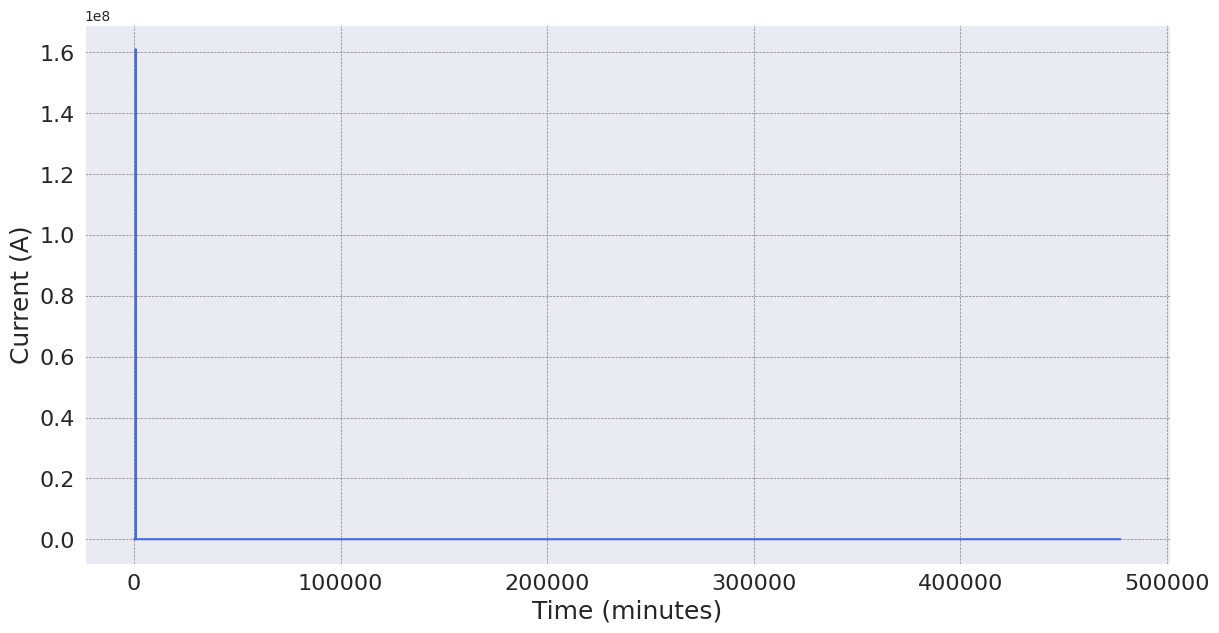

In [89]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.lineplot(battery["Current"], color="royalblue")

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Current (A)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

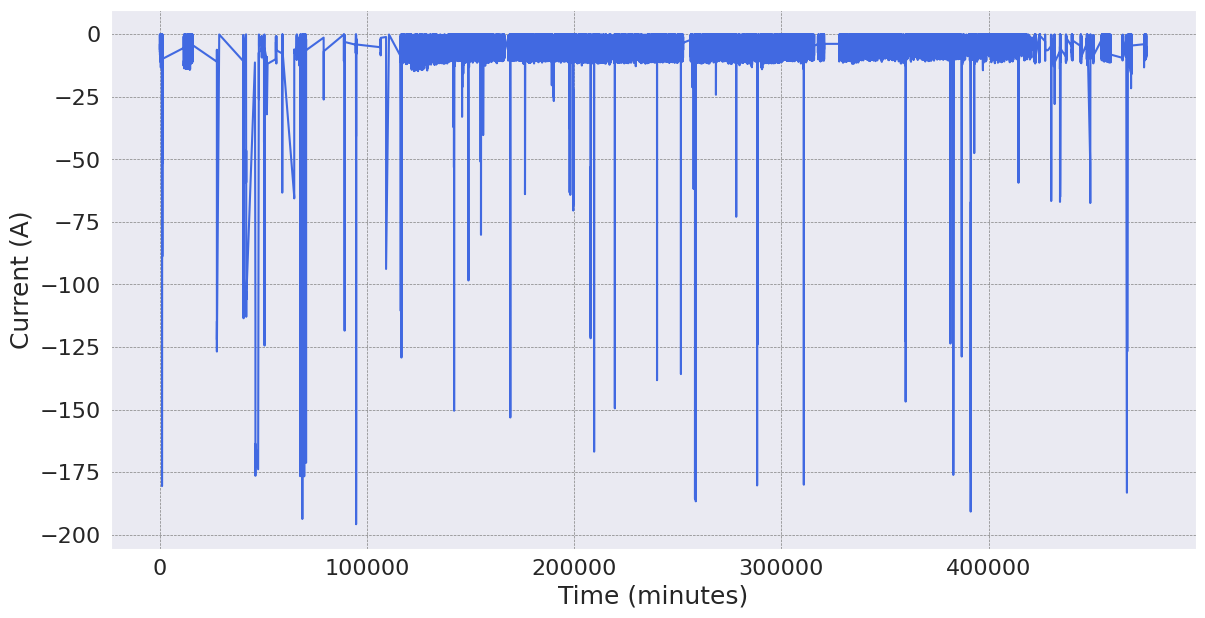

In [90]:
op_discharge_data = battery[(battery["Current"]<0) & (battery["Current"]>-200)]

sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.lineplot(op_discharge_data["Current"], color="royalblue")

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Current (A)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

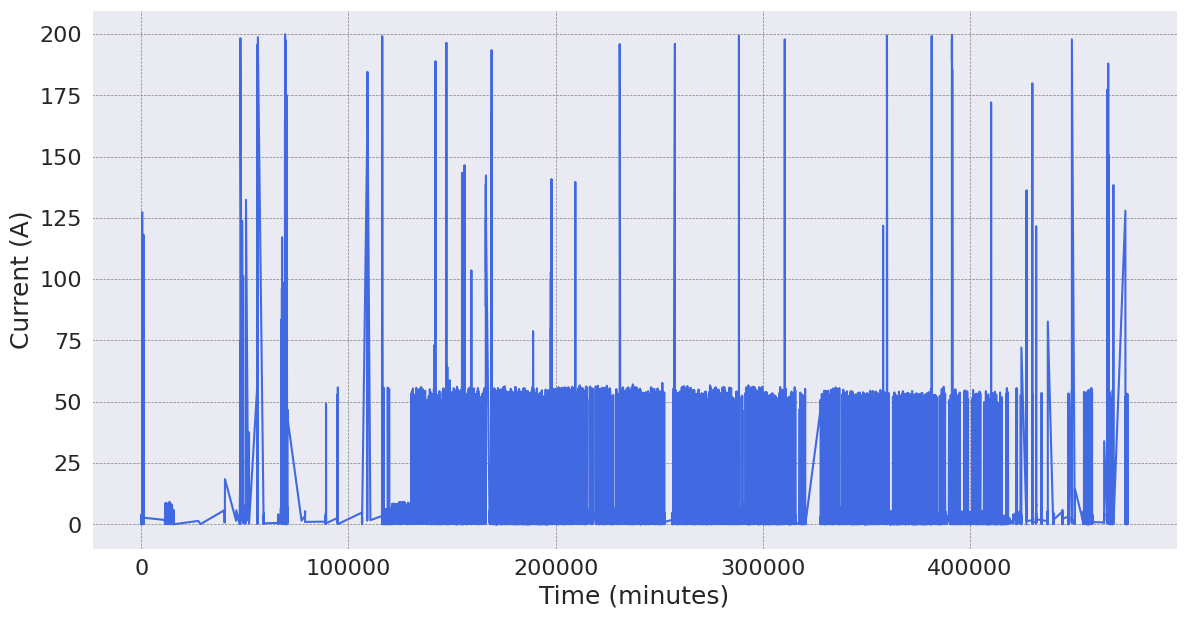

In [91]:
op_charge_data = battery[(battery["Current"]>0) & (battery["Current"]<200)]

sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.lineplot(op_charge_data["Current"], color="royalblue")

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Current (A)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

In [125]:
op_discharge_data = battery[(battery["Current"]<0) & (battery["Current"]>-200)]
op_discharge_current = op_discharge_data.Current
op_discharge_voltage = op_discharge_data.Voltage
op_discharge_soc = op_discharge_data.AVG_PACK_SOC

op_charge_data = battery[(battery["Current"]>0) & (battery["Current"]<200)]
op_charge_current = op_charge_data.Current
op_charge_voltage = op_charge_data.Voltage

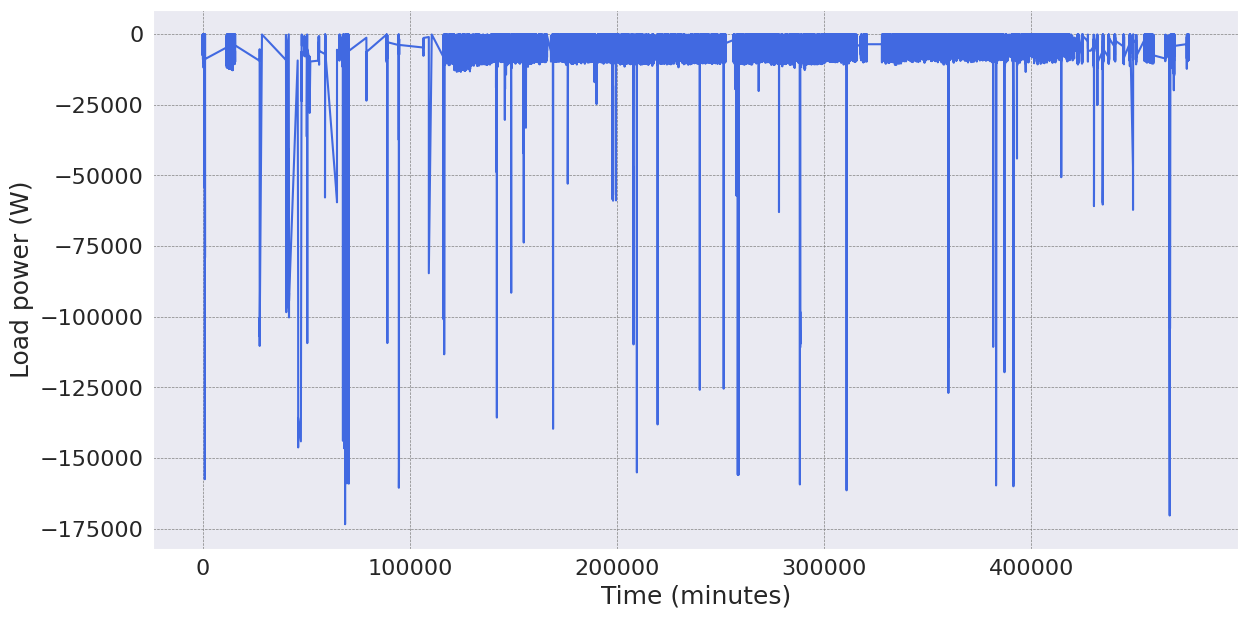

In [126]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.lineplot(op_discharge_data["Current"] * op_discharge_data["Voltage"], color="royalblue")

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Load power (W)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

In [107]:
bins = pd.cut(battery['Voltage'], 7)
tmp = battery.copy()

tmp['bins'] = bins

# Example: To get data from the second bin
second_bin = bins[3]
filtered_data = tmp[tmp['bins'] == second_bin]

In [124]:
bins.Categories

AttributeError: 'Series' object has no attribute 'Categories'

<Axes: >

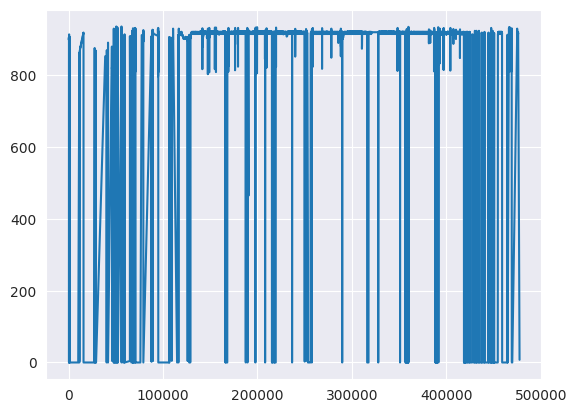

In [108]:
filtered_data["Voltage"].plot()

In [41]:
battery.columns

Index(['Unnamed: 0', 'time', 'AVG_PACK_SOC', 'AvgSOC', 'AvgSOH',
       'BATT_PACK_1_DISCONN', 'BATT_PACK_1_FAULT', 'BATT_PACK_1_WARN',
       'BATT_PACK_2_DISCONN', 'BATT_PACK_2_FAULT',
       ...
       'PACK_1_STATUS', 'PACK_2_STATUS', 'PACK_3_STATUS', 'PACK_4_STATUS',
       'PACK_5_STATUS', 'PACK_6_STATUS', 'PACK_7_STATUS', 'RunningState',
       'Voltage', 'valuestreamname'],
      dtype='object', length=111)